In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
from env import get_db_url
import re
import unicodedata
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [2]:
# acquire data 
url = get_db_url("spam_db")
sql = "SELECT * FROM spam"

df = pd.read_sql(sql, url, index_col="id")
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

In [3]:
# percent of messages that are spam and ham
labels = pd.concat([df.label.value_counts(),
                    df.label.value_counts(normalize=True)], axis=1)
labels.columns = ['n', 'percent']
labels


,n,percent
ham,4825,0.865937
spam,747,0.134063


In [4]:
# most messages are not spam 

In [5]:
ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']

def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [6]:
# cleaning data and splitting them into categories
ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))
all_words = clean(' '.join(df.text))



In [7]:
ham_words

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat',
 'ok',
 'lar',
 'joking',
 'wif',
 'oni',
 'dun',
 'say',
 'early',
 'hor',
 'c',
 'already',
 'say',
 'nah',
 'dont',
 'think',
 'go',
 'usf',
 'life',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'melle',
 'melle',
 'oru',
 'minnaminunginte',
 'nurungu',
 'vettam',
 'set',
 'callertune',
 'caller',
 'press',
 '9',
 'copy',
 'friend',
 'callertune',
 'im',
 'gonna',
 'home',
 'soon',
 'dont',
 'want',
 'talk',
 'stuff',
 'anymore',
 'tonight',
 'k',
 'ive',
 'cried',
 'enough',
 'today',
 'ive',
 'searching',
 'right',
 'word',
 'thank',
 'breather',
 'promise',
 'wont',
 'take',
 'help',
 'granted',
 'fulfil',
 'promise',
 'wonderful',
 'blessing',
 'time',
 'date',
 'sunday',
 'oh',
 'kim',
 'watching',
 'eh',
 'remember',
 'spell',
 'name',
 'yes',
 'v',
 'naught

In [8]:
# frequency value counts for words in ham, spam and both 
ham_freq = pd.Series(ham_words).value_counts()
spam_freq = pd.Series(spam_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

spam_freq.head()

call    359
free    216
txt     150
ur      144
text    137
dtype: int64

In [9]:
# dataframe combining value counts of ham, spam and both
word_counts = (pd.concat([all_freq, ham_freq, spam_freq], axis=1, sort=True)
                .set_axis(['all', 'ham', 'spam'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts.head()


,all,ham,spam
0,3,0,3
008704050406,2,0,2
0089my,1,0,1
0121,1,0,1
01223585236,1,0,1


In [10]:
# what words occur the least 
word_counts.sort_values(by='all', ascending=True).head(25)


,all,ham,spam
johnaosounds,1,1,0
medont,1,1,0
mecause,1,1,0
meatball,1,1,0
meat,1,1,0
meare,1,1,0
meaningless,1,1,0
meaningful,1,1,0
mcr,1,1,0
mc,1,1,0


In [11]:
# top 20 ham grams 

top_20_ham_bigrams = (pd.Series(nltk.ngrams(ham_words, 2))
                      .value_counts()
                      .head(20))

top_20_ham_bigrams.head(10)


(call, later)      52
(ill, call)        48
(let, know)        42
(sorry, ill)       39
(dont, know)       32
(good, morning)    31
(new, year)        30
(take, care)       26
(im, going)        24
(ok, lor)          22
dtype: int64

In [12]:
#some sense of feeling and sentiment more emotional adjectives, greeting salutation

In [13]:
# top 20 spam bigrams 
top_20_spam_bigrams = (pd.Series(nltk.ngrams(spam_words, 2))
                      .value_counts()
                      .head(20))

top_20_spam_bigrams.head(10)

(please, call)         44
(customer, service)    27
(po, box)              24
(a1000, cash)          23
(guaranteed, call)     23
(prize, guaranteed)    22
(send, stop)           19
(selected, receive)    19
(await, collection)    19
(every, week)          19
dtype: int64

In [14]:
# sense of time, action words, frequency 

In [15]:
#python -m pip install --upgrade wordcloud

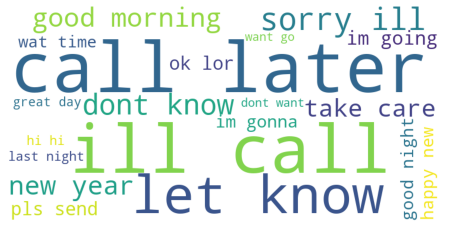

In [16]:
# We can supply our own values to be used to determine how big the words (or
# phrases) should be through the `generate_from_frequencies` method. The
# supplied values must be in the form of a dictionary where the keys are the
# words (phrases), and the values are numbers that correspond to the sizes.
#
# We'll convert our series to a dictionary, and convert the tuples that make up
# the index into a single string that holds each phrase.

#ham words

data = {k[0] + ' ' + k[1]: v for k, v in top_20_ham_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

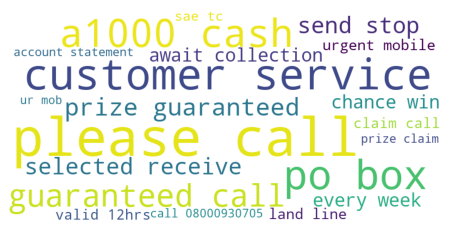

In [17]:
#spam words

data = {k[0] + ' ' + k[1]: v for k, v in top_20_spam_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

In [18]:
# top 20 all_words bigrams 
top_20_allwords_bigrams = (pd.Series(nltk.ngrams(all_words, 2))
                      .value_counts()
                      .head(20))

top_20_allwords_bigrams.head(10)

(please, call)         53
(call, later)          52
(ill, call)            48
(let, know)            42
(sorry, ill)           39
(dont, know)           38
(new, year)            32
(good, morning)        31
(customer, service)    29
(take, care)           26
dtype: int64

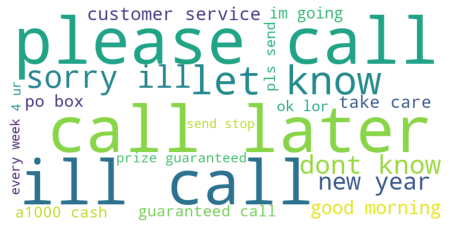

In [19]:
# all words wordcloud
data = {k[0] + ' ' + k[1]: v for k, v in top_20_allwords_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

In [20]:
df

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."


In [21]:
# create column with the length of each message
df_cleaned['stem_character_length'] = df['stemmed'].str.len()
df_cleaned['lemmatized_character_length'] = df['lemmatized'].str.len()
df_cleaned['clean_character_length'] = df['clean'].str.len()
df_cleaned['original_character_length'] = df['text'].str.len()
df_cleaned.head()

KeyError: 'stemmed'

In [ ]:
df

In [ ]:
# data split 20,25,55
train_validate, test = train_test_split(df_cleaned, test_size=.2,
                                       random_state=100,
                                       stratify=df_cleaned['label'])
train, validate = train_test_split(train_validate, test_size =.25,
                                  random_state=100,)


In [ ]:
# word length for stem text in ham messages 
ham_stem_length = train[train.label == "ham"].stem_character_length

In [ ]:
# word length for stem text in spam messages 
spam_stem_length = train[train.label == "spam"].stem_character_length

In [ ]:
# visualize spam message length versus stem character length 
sns.barplot(data=train, x = 'label', y='stem_character_length').set(title = 'total stem character length')